In [1]:
%load_ext autoreload

In [2]:
from itertools import combinations
import json
import os

import matplotlib.pyplot as plt
import numpy as np

from data import COUNTRIES, get_all_data_and_labels
from utils import make_comparable

In [3]:
CORRS_FILE = 'correlations.json'

In [4]:
all_data, all_labels = get_all_data_and_labels()
all_data_clean, all_labels_clean = get_all_data_and_labels(cleaned=True)

In [5]:
# For reference if you want to look up anything
print(all_labels)
print(COUNTRIES)

['bond_rets_local_fx', 'equity_prices', 'curr_acct_nom_usd', 'curr_acct_pct_gdp', 'fx_trd_wts_nom', 'fx_trd_wts_real', 'fx_vs_usd', 'gdp_nom', 'gdp_real', 'short_rates', 'long_rates', 'core_cpi_sa', 'm1_usd', 'm2_usd', 'm3_usd']
['USA', 'AUS', 'JPN', 'CAN', 'CHE', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU']


In [6]:
def compute_corrs(all_data, all_labels):
    corrs = {}

    for i, j in combinations(range(len(all_data)), r=2):
        if all_labels[i] not in corrs:
            corrs[all_labels[i]] = {}
        if all_labels[j] not in corrs[all_labels[i]]:
            corrs[all_labels[i]][all_labels[j]] = {}
        if all_labels[j] not in corrs:
            corrs[all_labels[j]] = {}
        if all_labels[i] not in corrs[all_labels[j]]:
            corrs[all_labels[j]][all_labels[i]] = {}

        inner_corrs = {}
        for country in COUNTRIES:
            if country not in all_data[i] or country not in all_data[j]:
                continue

            series1, series2 = make_comparable(all_data[i][country], all_data[j][country])
            inner_corrs[country] = np.corrcoef(series1, series2)[0,1]
            
        country_corrs_arr = np.array(list(inner_corrs.values()))
        inner_corrs['min'] = country_corrs_arr.min()
        inner_corrs['max'] = country_corrs_arr.max()
        inner_corrs['mean'] = country_corrs_arr.mean()
        inner_corrs['median'] = np.median(country_corrs_arr)
        inner_corrs['std'] = country_corrs_arr.std()

        corrs[all_labels[i]][all_labels[j]] = inner_corrs
        corrs[all_labels[j]][all_labels[i]] = inner_corrs
    
    return corrs


In [7]:
# Load or compute correlations
if os.path.exists(CORRS_FILE):
    corrs = json.load(open(CORRS_FILE, 'r'))
else:
    corrs = compute_corrs(all_data, all_labels)
    json.dump(corrs, open(CORRS_FILE, 'w'), indent=4)

In [8]:
def print_combos_info(combos):
    for i, j in combos:
        print(all_labels[i], 'and', all_labels[j])
        for k, v in corrs[all_labels[i]][all_labels[j]].items():
            print('\t', k, v)

In [9]:
combos = combinations(range(len(all_data)), r=2)
sorted_combos = sorted(combos, key=lambda x: (
    -corrs[all_labels[x[0]]][all_labels[x[1]]]['std'],
    # optionally, check the min-max spread instead of STD:
    # corrs[all_labels[x[0]]][all_labels[x[1]]]['min'] - corrs[all_labels[x[0]]][all_labels[x[1]]]['max'],
    abs(corrs[all_labels[x[0]]][all_labels[x[1]]]['median']),
    abs(corrs[all_labels[x[0]]][all_labels[x[1]]]['mean'])
))

In [10]:
print_combos_info(reversed(sorted_combos))

m2_usd and m3_usd
	 JPN 0.9885584261339267
	 CAN 0.9980761540837662
	 CHE 0.9959114851545958
	 GBR 0.9893070443266496
	 ESP 0.9862353805111309
	 FRA 0.9887367169547114
	 ITA 0.989486263561287
	 DEU 0.9971764173187974
	 min 0.9862353805111309
	 max 0.9980761540837662
	 mean 0.9916859860056081
	 median 0.9893966539439683
	 std 0.004294196496667689
short_rates and long_rates
	 USA 0.9771850458690086
	 AUS 0.9865826330275205
	 JPN 0.9763288401874088
	 CAN 0.9732872387521291
	 CHE 0.945020396566517
	 GBR 0.9501107103112019
	 ESP 0.9770159163579691
	 FRA 0.9746358111283059
	 ITA 0.9855803540015508
	 DEU 0.9739198829565452
	 min 0.945020396566517
	 max 0.9865826330275205
	 mean 0.9719666829158158
	 median 0.9754823256578573
	 std 0.012989155147536803
bond_rets_local_fx and short_rates
	 USA -0.8661616185757826
	 AUS -0.837292375506868
	 JPN -0.8611727069300693
	 CAN -0.8986882741344087
	 CHE -0.9105574139563059
	 GBR -0.9213926044254068
	 ESP -0.8328620854277534
	 FRA -0.9022113680022245
	 IT

	 mean 0.627856368395537
	 median 0.748848554259785
	 std 0.2827137644890404
curr_acct_pct_gdp and fx_vs_usd
	 USA -0.06677506577223513
	 AUS 0.050285046266263574
	 JPN 0.28381139158068214
	 CAN 0.38824629695925955
	 CHE -0.3700323924318538
	 GBR 0.26087258264669433
	 ESP 0.13146648224146473
	 FRA 0.5093111220120392
	 ITA 0.312172658855884
	 DEU -0.34236481289065435
	 min -0.3700323924318538
	 max 0.5093111220120392
	 mean 0.11569933094675444
	 median 0.19616953244407953
	 std 0.28297233104875674
fx_vs_usd and m3_usd
	 AUS -0.23230943095623138
	 JPN -0.7624298081023293
	 CAN -0.38449615728090675
	 CHE -0.8142567417931699
	 GBR -0.19832474878881173
	 ESP -0.7628848963895968
	 FRA -0.5130798812416307
	 ITA 0.07367708930917574
	 DEU -0.5980469251650254
	 min -0.8142567417931699
	 max 0.07367708930917574
	 mean -0.4657946111565029
	 median -0.5130798812416307
	 std 0.28695762682096587
curr_acct_pct_gdp and fx_trd_wts_nom
	 USA 0.3464501837921188
	 AUS -0.013089167308459394
	 JPN -0.3428145

	 ITA 0.05832990931298586
	 DEU 0.9072620247345996
	 min -0.745016006051213
	 max 0.9072620247345996
	 mean 0.08928485024677227
	 median 0.031141392625502223
	 std 0.5352128518088128
fx_trd_wts_real and fx_vs_usd
	 USA -0.8439927969312181
	 AUS -0.7696104555538849
	 JPN -0.31240928660718503
	 CHE -0.7985344261849328
	 GBR 0.5911679904937645
	 min -0.8439927969312181
	 max 0.5911679904937645
	 mean -0.42667579495669133
	 median -0.7696104555538849
	 std 0.5438932449856979
fx_trd_wts_real and m2_usd
	 USA 0.676001553957091
	 JPN -0.17470190361351073
	 CHE 0.8014796062037904
	 GBR -0.5061200794753248
	 min -0.5061200794753248
	 max 0.8014796062037904
	 mean 0.19916479426801145
	 median 0.25064982517179013
	 std 0.5539312883797053
fx_trd_wts_nom and gdp_nom
	 USA 0.7576296640389869
	 AUS 0.1624261742592246
	 JPN 0.8727588655035315
	 CHE 0.9549940244928212
	 GBR -0.5126167615918139
	 min -0.5126167615918139
	 max 0.9549940244928212
	 mean 0.44703839334055007
	 median 0.7576296640389869
	 st

***Psst!*** Hey you, peeping at my file! Are you a Bridgewater intern or full-timer? Are you curious about how the two curves below relate? Do you like fourier transforms? Were you born with an innate desire to learn what acronyms stand for like EMD or DFA? If you answered yes to the first and any of the remaining questions, shoot me a message!

<AxesSubplot:xlabel='date'>

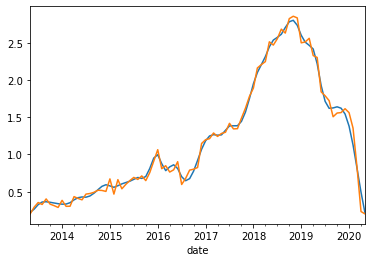

In [11]:
all_data_clean[9]['USA'].dropna()[400:485].plot()
all_data[9]['USA'].dropna()[400:485].plot()